In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis
import pack_dimer
import pack_vis_sol
import pack_cost
import numpy as np
import cupy as cp
import copy
kgs.set_float32(True)

local


In [18]:
%load_ext pyinstrument

_     ._   __/__   _ _  _  _ _/_   Recorded: 10:11:31  Samples:  5892
 /_//_/// /_\ / //_// / //_'/ //     Duration: 7.527     CPU time: 7.702
/   _/                      v5.1.1

Cell [20]

7.527 <module>  /tmp/ipykernel_288136/4245849064.py:1
`- 7.496 dataframe_to_solution_list  pack_io.py:125
   |- 6.784 score  pack_metric.py:82
   |  |- 2.334 ChristmasTree.__init__  pack_metric.py:30
   |  |  |- 0.936 type.__new__  shapely/geometry/polygon.py:227
   |  |  |     [10 frames hidden]  shapely
   |  |  |- 0.669 rotate  shapely/affinity.py:126
   |  |  |     [7 frames hidden]  shapely, numpy
   |  |  |- 0.454 translate  shapely/affinity.py:247
   |  |  |     [4 frames hidden]  shapely
   |  |  `- 0.275 [self]  pack_metric.py
   |  |- 1.625 CollectionOperator.unary_union  shapely/ops.py:111
   |  |     [2 frames hidden]  shapely
   |  |        1.624 union_all  shapely/set_operations.py:463
   |  |- 0.908 DataFrame.iterrows  pandas/core/frame.py:1514
   |  |     [6 frames hidden]  pandas
   |  |- 0.752 Polygon.intersects  shapely/geometry/base.py:817
   |  |     [4 frames hidden]  shapely
   |  |- 0.258 Series.__getitem__  pandas/core/series.py:1107
   |  |  `- 0.132 Series._get_value  pandas/core/series.py:1232
   |  |- 0.130 StringMethods.wrapper  pandas/core/strings/accessor.py:132
   |  |  `- 0.098 StringMethods.startswith  pandas/core/strings/accessor.py:2442
   |  |- 0.129 [self]  pack_metric.py
   |  |- 0.113 STRtree.query  shapely/strtree.py:109
   |  |- 0.109 Series.astype  pandas/core/generic.py:6485
   |  |- 0.098 BaseGrouper.get_iterator  pandas/core/groupby/ops.py:616
   |  |- 0.087 StringMethods.__getitem__  pandas/core/strings/accessor.py:251
   |  `- 0.075 DataFrame.__setitem__  pandas/core/frame.py:4282
   |- 0.182 SolutionCollectionSquare.snap  kaggle_support.py:528
   |- 0.142 StringMethods.wrapper  pandas/core/strings/accessor.py:132
   |  `- 0.125 StringMethods.startswith  pandas/core/strings/accessor.py:2442
   `- 0.097 StringMethods.__getitem__  pandas/core/strings/accessor.py:251
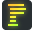

In [19]:
%%pyinstrument
import pack_io
importlib.reload(pack_io)
import pandas as pd
theirs = pack_io.dataframe_to_solution_list(pd.read_csv(kgs.code_dir + '../res/71.01.csv'))

In [5]:
theirs[1][39]

0.3621547396910639

44.44444444444444

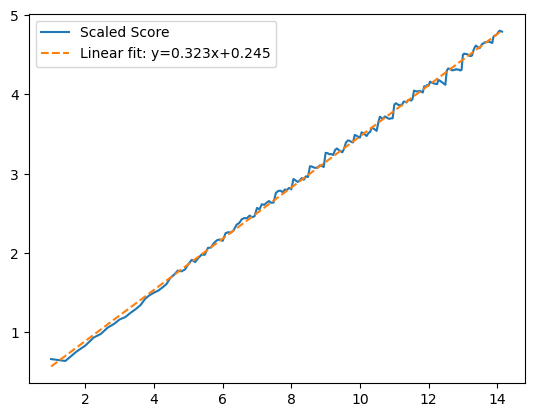

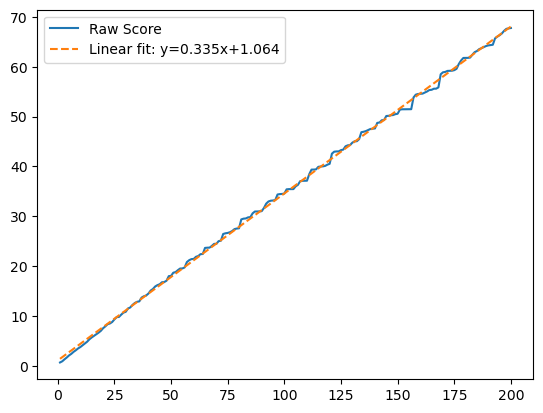

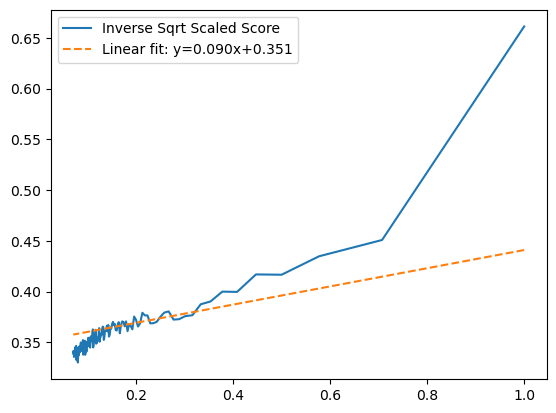

In [15]:
import matplotlib.pyplot as plt
N_trees = np.arange(1,201)
x1 = np.sqrt(N_trees)
y1 = theirs[1]*N_trees / x1
coeff1 = np.polyfit(x1, y1, 1)
plt.figure()
plt.plot(x1, y1, label='Scaled Score')
plt.plot(x1, coeff1[0]*x1 + coeff1[1], '--', label=f'Linear fit: y={coeff1[0]:.3f}x+{coeff1[1]:.3f}')
plt.legend()

y2 = theirs[1]*N_trees
coeff2 = np.polyfit(N_trees, y2, 1)
plt.figure()
plt.plot(N_trees, y2, label='Raw Score')
plt.plot(N_trees, coeff2[0]*N_trees + coeff2[1], '--', label=f'Linear fit: y={coeff2[0]:.3f}x+{coeff2[1]:.3f}')
plt.legend()

plt.figure()
x3 = 1/np.sqrt(N_trees)
y3 = theirs[1]
coeff3 = np.polyfit(x3[10:40], y3[10:40], 1)
plt.plot(x3, y3, label='Inverse Sqrt Scaled Score')
plt.plot(x3, coeff3[0]*x3 + coeff3[1], '--', label=f'Linear fit: y={coeff3[0]:.3f}x+{coeff3[1]:.3f}')
plt.legend()
1/0.15**2

In [14]:
0.62
0.62/2

0.31

In [ ]:
# from tqdm import tqdm
# import multiprocess

# multiprocess.set_start_method('spawn', force=True)

# def do_one(sol):
#     import pack_io
#     import kaggle_support as kgs
#     kgs.set_float32(True)
#     return pack_io.legalize(sol)

# with multiprocess.Pool(processes=5) as pool:
#     overall_best_legalized = list(
#         tqdm(
#             pool.imap(do_one, overall_best),
#             total=len(overall_best),
#             desc="Legalizing"
#         )
#     )
# #kgs.dill_save(kgs.temp_dir + 'tess_legalized.pickle', overall_best_legalized)
# kgs.dill_save(kgs.code_dir + '../res/tess_legalized.pickle', pop)
overall_best_legalized = kgs.dill_load(kgs.code_dir + '../res/tess_legalized.pickle')
for s in overall_best_legalized:
    s.xyt = s.xyt.astype(kgs.dtype_cp)
    s.h = s.h.astype(kgs.dtype_cp)
overall_best_legalized_score = [(x.h[0,0]**2/x.N_trees).get() for x in overall_best_legalized]
mine = (overall_best_legalized, overall_best_legalized_score)
#mine = pack_io.dataframe_to_solution_list(pd.read_csv(kgs.temp_dir + '71.01.csv'))

(np.float64(71.01294293429139),
 np.float32(72.197014),
 np.float64(70.94691570820768))

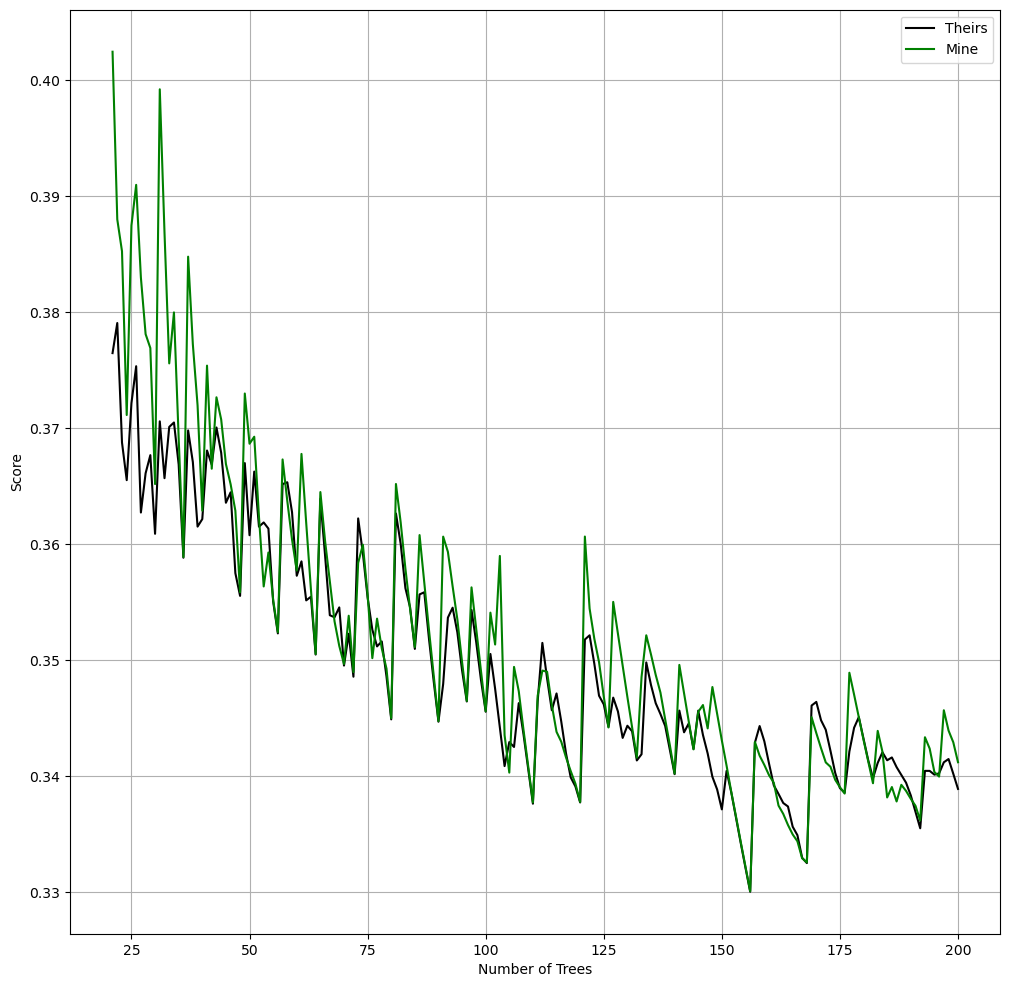

In [4]:
import mplcursors
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
N_trees = np.arange(1,201)
N=20
lines = []
vals_res = np.array([np.inf]*200)
line = plt.plot(N_trees[N:], theirs[1][N:], 'k')
lines.extend(line)
line = plt.plot(N_trees[N:], mine[1][N:], 'g')
lines.extend(line)

plt.grid(True)
plt.legend(('Theirs', 'Mine'))
plt.xlabel('Number of Trees')
plt.ylabel('Score')

# Add interactive cursor for all lines
mplcursors.cursor(lines, hover=True)
np.sum(theirs[1]), np.sum(mine[1]), np.sum(np.minimum(theirs[1], mine[1]))

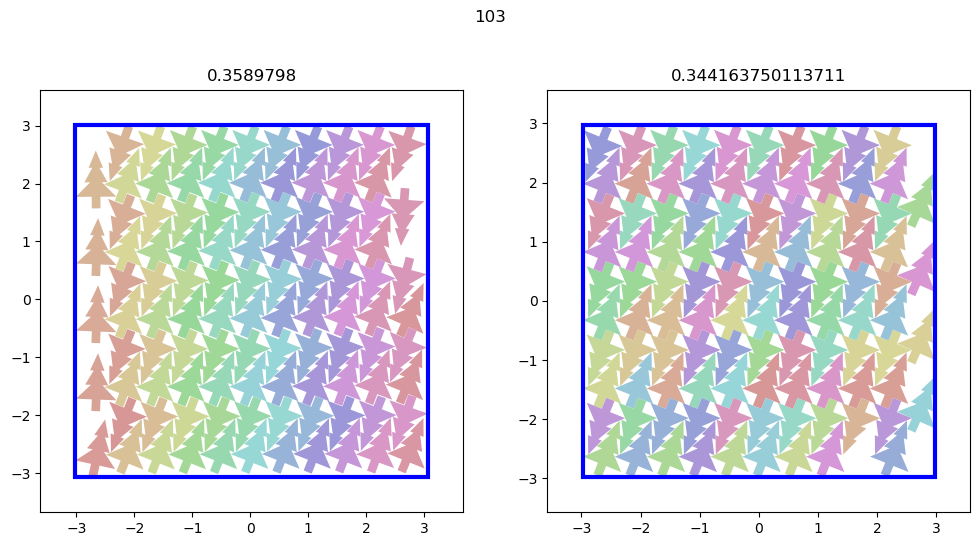

In [8]:
for N in [103]:
    _,ax = plt.subplots(1,2,figsize=(12,6))
    pack_vis_sol.pack_vis_sol(mine[0][N-1], solution_idx=0, ax=ax[0])
    plt.sca(ax[0])
    plt.title(mine[1][N-1])
    sol2 = copy.deepcopy(theirs[0][N-1])
    sol2.rotate(cp.array([np.pi/2]))
    sol2.snap()
    #sol2.xyt = cp.concatenate((overall_best[N-1].xyt, sol2.xyt), axis=1)
    pack_vis_sol.pack_vis_sol(sol2, solution_idx=0, ax=ax[1])
    plt.sca(ax[1])
    plt.title(theirs[1][N-1])
    plt.suptitle(N)

In [6]:
import pack_io
pd = pack_io.solution_list_to_dataframe(overall_best_legalized, compact=False)
pd.to_csv(kgs.temp_dir + 'submission.csv', index=False)

Score of generated dataframe: 72.19628993649975
